<a href="https://colab.research.google.com/github/alperbozoglu/LectureNotes/blob/main/DateFruitDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df = pd.read_excel("Date_Fruit_Datasets.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [4]:
df.Class.nunique()

7

In [5]:
X = df.drop(columns = ["Class"])
y = df.Class
y.head(3)

,Class
0,BERHI
1,BERHI
2,BERHI


In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.25, random_state = 42)

X_val.shape

(180, 34)

In [10]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
X_val = ss.fit_transform(X_val)

In [11]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Dense(34, activation = "relu", input_shape = (34,)))#Giriş layer
model.add(layers.Dense(70, activation = "relu"))    #Hidden layer
model.add(layers.Dense(50, activation = "relu"))    #Hidden layer
model.add(layers.Dense(7, activation = "softmax"))  #Çıkış layer
#Son satırda kaç classın varsa o kadar Dense olmalı

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 100, verbose = True, validation_data = (X_val,y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4035 - loss: 1.7270 - val_accuracy: 0.6833 - val_loss: 1.2393
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6680 - loss: 1.1159 - val_accuracy: 0.7056 - val_loss: 0.8748
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7595 - loss: 0.7105 - val_accuracy: 0.7556 - val_loss: 0.6943
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7821 - loss: 0.5731 - val_accuracy: 0.8111 - val_loss: 0.5261
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7973 - loss: 0.4872 - val_accuracy: 0.8278 - val_loss: 0.5096
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8676 - loss: 0.3588 - val_accuracy: 0.8722 - val_loss: 0.4240
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9210 - loss: 0.3110 - val_accuracy: 0.8611 - val_loss: 0.3873
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9043 - loss: 0.2766 - val_accuracy: 0.8889 - 

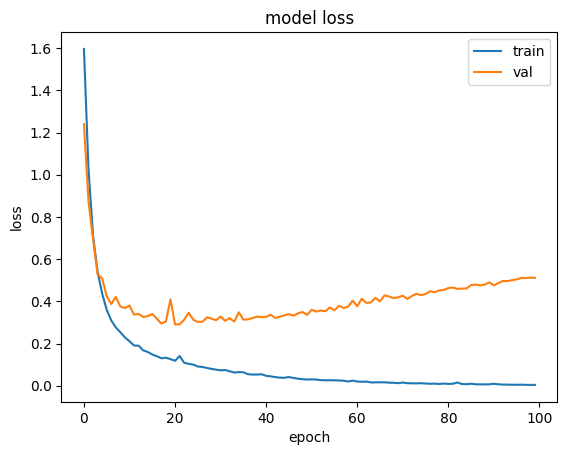

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper right')
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.79      0.75      0.77        20
           2       1.00      0.94      0.97        50
           3       0.67      1.00      0.80        10
           4       1.00      0.89      0.94        35
           5       1.00      1.00      1.00        33
           6       0.76      0.95      0.84        20

    accuracy                           0.92       180
   macro avg       0.89      0.91      0.89       180
weighted avg       0.93      0.92      0.92       180



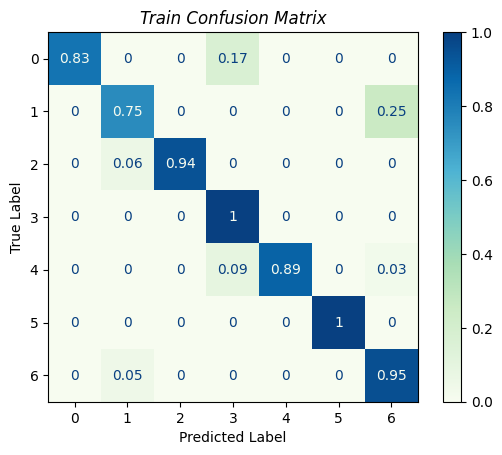

In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay,confusion_matrix
import numpy as np
yTestPred = model.predict(X_test)
yTestPred = np.argmax(yTestPred, axis =1)
yTest = np.asarray(y_test)
print(classification_report(yTest,yTestPred))
cm = confusion_matrix(yTest,yTestPred,normalize = "true").round(2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp = disp.plot(cmap = plt.cm.GnBu, values_format = 'g')
plt.title(f"Train Confusion Matrix", style = 'italic')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()